In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

heart= pd.read_csv('heart.csv')
print(heart.shape)










(1025, 14)


In [11]:
# our goal is to try understand the data we got lets start 
# here we can see the info of each attribute  in the heart dataframe  as you can see it is not null 
heart.info()
#we want to know in each coll or"attr" what are the distnguish value we have the counter of differ value 
print(heart.nunique())
''' as you  '''
#let us rename the colm we  have to be more understandable 
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']
import seaborn as sns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


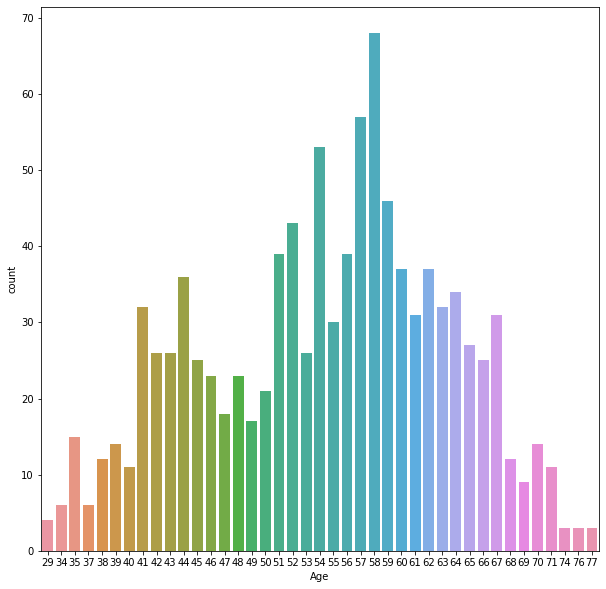

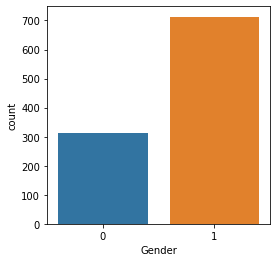

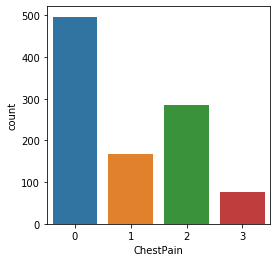

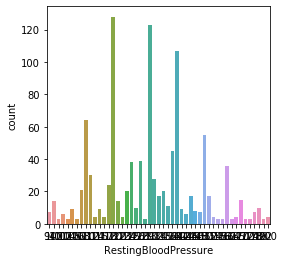

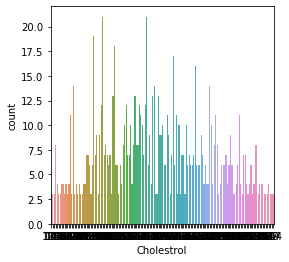

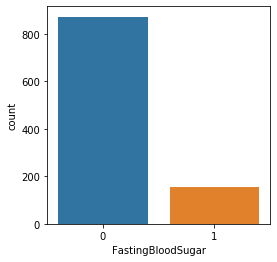

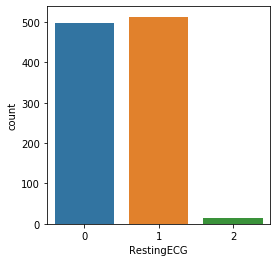

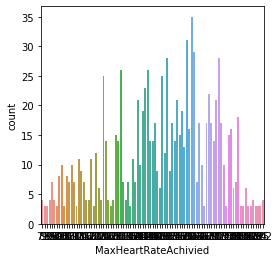

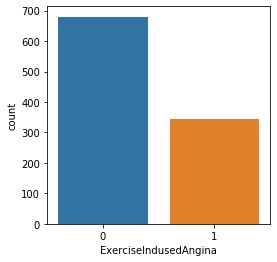

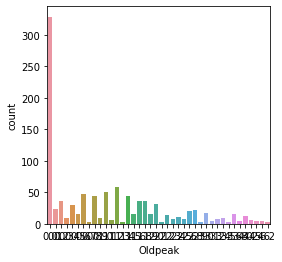

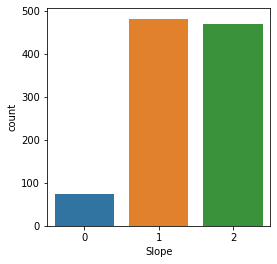

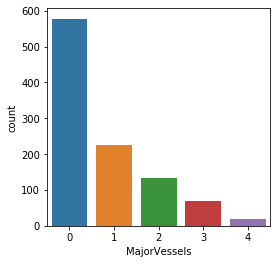

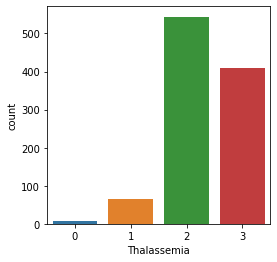

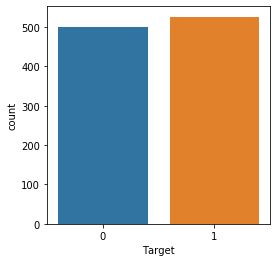

<Figure size 288x288 with 0 Axes>

In [12]:
arr=[]
fig=plt.figure(figsize=(10, 10))

for i in heart:
    ax=sns.countplot(x=i,data=heart)
    arr.append(ax)
    fig=plt.figure(figsize=(4, 4))
#     plt.title(i)

    
# fig.show()


In [13]:

# this is the data plot of all the attrr counter of each value in attr 
import itertools
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/count')

# plt.show()

hi


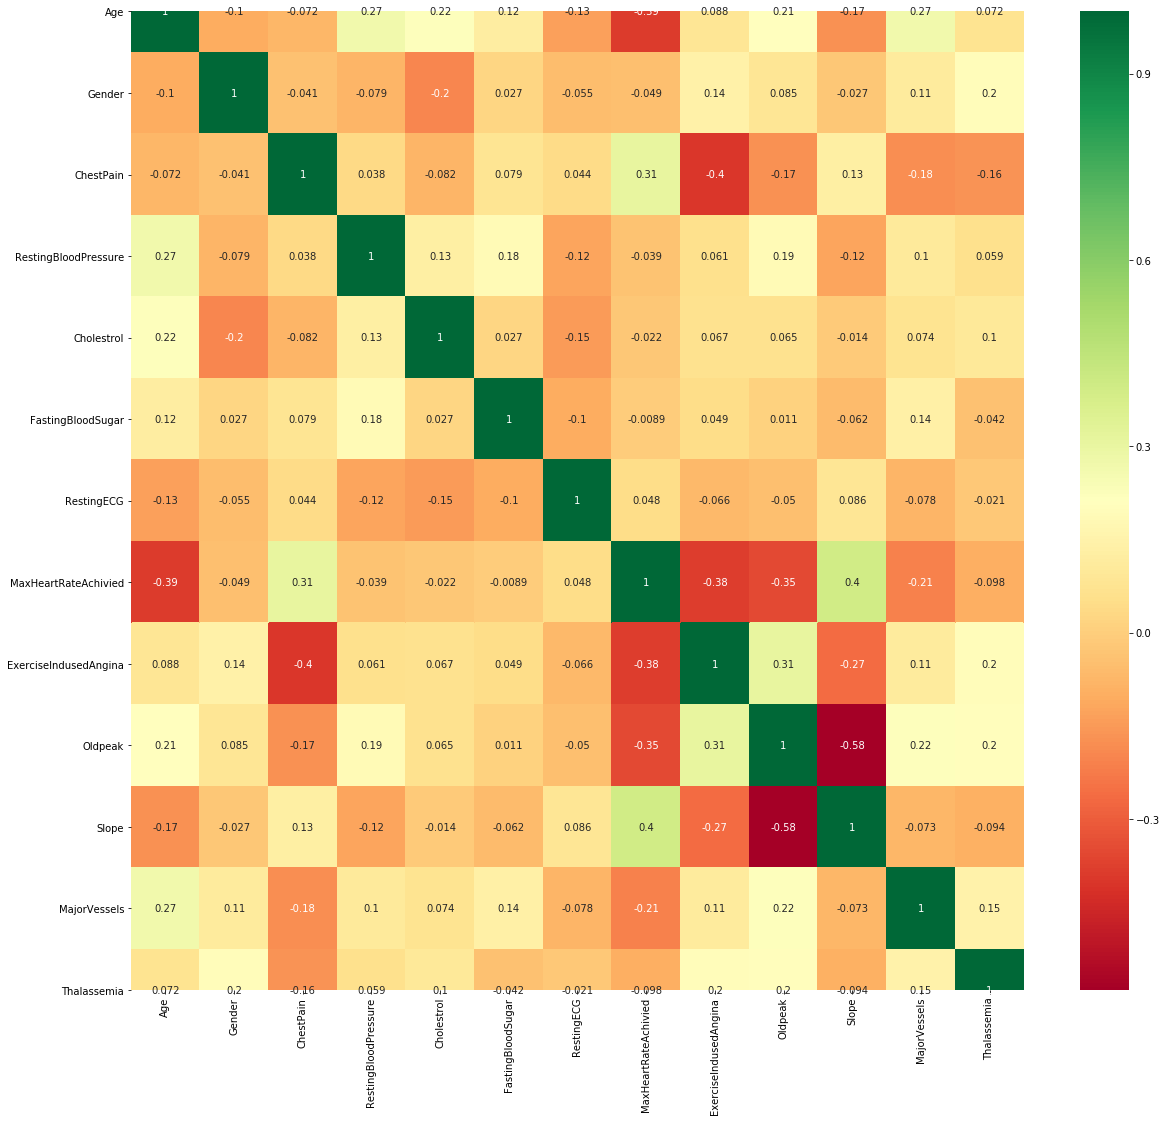

In [14]:
# this is the data plot of all the attrr counter of each value in attr 

# print("hssi")
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     ax=sns.swarmplot(heart[i] )
# #     plt.plot(ax)
# #     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/ss')

# plt.show()

sns.heatmap(heart[heart.columns[:13]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.savefig('new_plot/correlationofdata')
# plt.show()


print("hi")

In [15]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

from sklearn.utils.multiclass import unique_labels

from sklearn.metrics import f1_score






In [16]:

#### lets know split the data we have in order to start the learning procsses 
heart.head()
X_data = heart.drop(columns=['Target'], axis=1)
Y = heart['Target']

#normalize the data
Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values
# we want here to seprate the data for the learning procsses testdata=30% train 70 %
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
print(" yoi ")

print(len(Y))
print(len(y_test))

 yoi 
1025
308


score is 0.8246753246753247
 confision is  [[119  40]
 [ 14 135]]
 eror of logstic is  0.17532467532467533
f1 score  0.8239044060961869


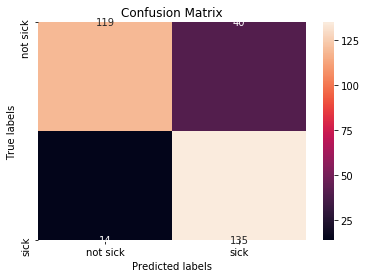

<function matplotlib.pyplot.show(*args, **kw)>

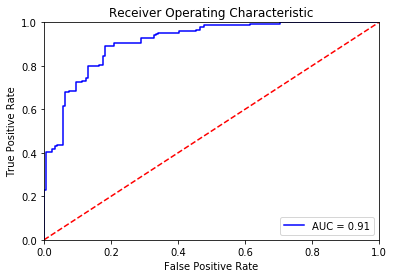

In [17]:
# let know use two type of classfication algortimm i will first use logstic regression 
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
error_LR=1-score
print("score is",score)
from sklearn.metrics import confusion_matrix 

cmlogstic=confusion_matrix(y_test,pred)
print(" confision is ",cmlogstic)
#####################################3
import seaborn as sns
import matplotlib.pyplot as plt   
# def result_score_of_model(model,ytest):
#     score=model.score
    
def plot_heat(cm,title):
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not sick', 'sick']); ax.yaxis.set_ticklabels(['not sick', 'sick']);
    plt.savefig('new_plot/'+title)
    plt.show()
plot_heat(cmlogstic,'logsticheat')
fa_logstic=f1_score(y_test, pred, average='weighted')

print(" eror of logstic is ",error_LR)
print("f1 score ",fa_logstic)
###########################3
probs = logisticRegr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show



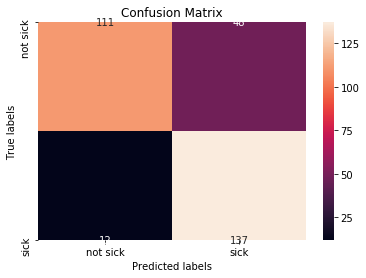

308
Accuracy for SVM kernel= rbf is 0.8051948051948052
308
Accuracy for SVM kernel= linear is 0.8344155844155844


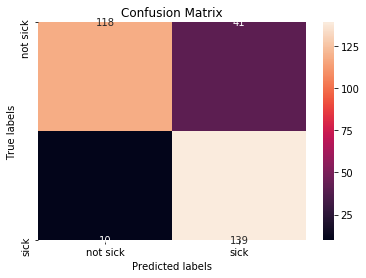

In [18]:

# usin svm learning algotrim 
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
#     predsvm=mo.predict(x_test)
    svm_prediction=model.predict(x_test)
    cmsvm=confusion_matrix(y_test,svm_prediction)
    plot_heat(cmsvm,i+' svm')
    
    print(len(svm_prediction))
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(svm_prediction,y_test))